<a href="https://colab.research.google.com/github/piyushpp07/DataScience/blob/main/Property_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/ywchiu/riii/master/data/house-prices.csv')

In [3]:
train.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [4]:
train.sample(10)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
47,48,90300,2050,3,2,6,No,North
57,58,152300,2240,4,3,3,No,West
48,49,115900,1980,2,2,2,No,East
4,5,119800,2130,3,3,3,No,East
17,18,83600,1990,3,3,4,No,North
16,17,147100,2190,3,3,4,Yes,East
102,103,136800,2410,3,3,4,No,East
124,125,147900,2160,4,3,3,Yes,East
116,117,199500,2290,5,4,1,Yes,West
108,109,117000,1990,3,3,3,Yes,East


In [5]:
train.corr()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
Home,1.000000,0.108190,0.168553,-0.068568,0.127694,-0.053597
Price,0.108190,1.000000,0.552982,0.525926,0.523258,-0.313636
SqFt,0.168553,0.552982,1.000000,0.483807,0.522745,0.336923
Bedrooms,-0.068568,0.525926,0.483807,1.000000,0.414556,0.114271
Bathrooms,0.127694,0.523258,0.522745,0.414556,1.000000,0.143793
Offers,-0.053597,-0.313636,0.336923,0.114271,0.143793,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


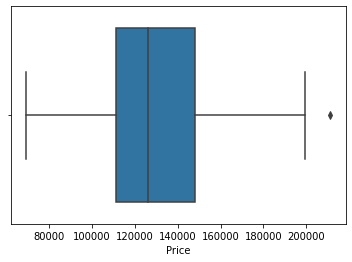

In [6]:
sns.boxplot(train['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


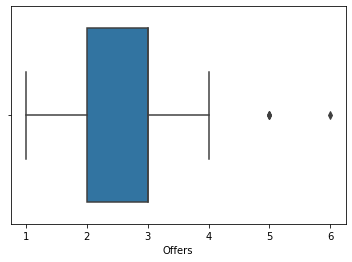

In [7]:
sns.boxplot(train.Offers)

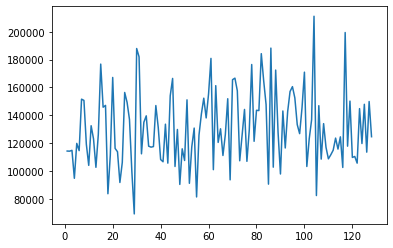

In [8]:
plt.plot(train['Home'],train['Price'])

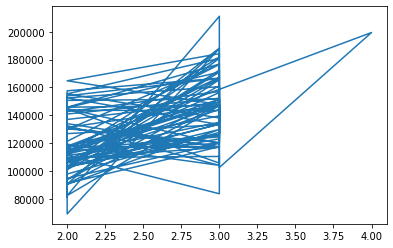

In [9]:
plt.plot(train['Bathrooms'],train['Price'])

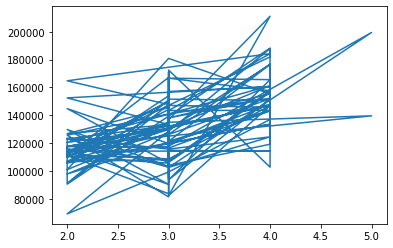

In [10]:
plt.plot(train['Bedrooms'],train['Price'])

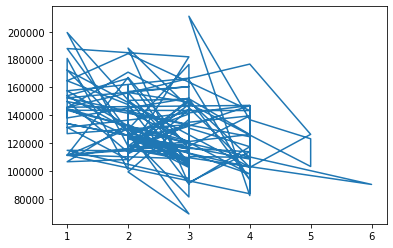

In [11]:
plt.plot(train['Offers'],train['Price'])

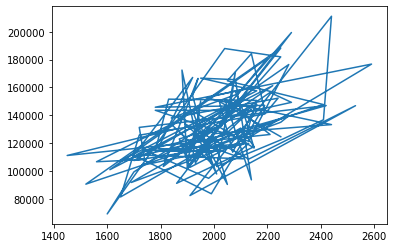

In [12]:
plt.plot(train['SqFt'],train['Price'])

In [13]:
train.isna().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

In [14]:
a = pd.get_dummies(train['Neighborhood'])

In [15]:

b = pd.get_dummies(train['Brick'])

In [16]:
train = pd.concat([train,a,b],axis=1)

In [17]:
train.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,East,North,West,No,Yes
0,1,114300,1790,2,2,2,No,East,1,0,0,1,0
1,2,114200,2030,4,2,3,No,East,1,0,0,1,0
2,3,114800,1740,3,2,1,No,East,1,0,0,1,0
3,4,94700,1980,3,2,3,No,East,1,0,0,1,0
4,5,119800,2130,3,3,3,No,East,1,0,0,1,0


In [18]:
train.drop(['Brick','Neighborhood'],axis = 1,inplace = True)

In [19]:
train

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,East,North,West,No,Yes
0,1,114300,1790,2,2,2,1,0,0,1,0
1,2,114200,2030,4,2,3,1,0,0,1,0
2,3,114800,1740,3,2,1,1,0,0,1,0
3,4,94700,1980,3,2,3,1,0,0,1,0
4,5,119800,2130,3,3,3,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,1,0,0,0,1
124,125,147900,2160,4,3,3,1,0,0,0,1
125,126,113500,2070,2,2,2,0,1,0,1,0
126,127,149900,2020,3,3,1,0,0,1,1,0


In [20]:
X = train.drop(['Price'],axis = 1)
y = train['Price']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

In [23]:
from sklearn.svm import SVC

In [24]:
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)
  
prediction = svc_model.predict(X_test)
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9586776859504132
0.0


In [25]:
 from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train,y_train)

LinearRegression()

In [28]:
model.predict(X_test)

array([ 99162.2273723 , 160281.26950348, 102396.51221204, 100334.41219013,
       120780.18130733, 135439.13263657, 124811.67872565])

In [29]:
model.score(X_test,y_test)

0.8082110351288361

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
import numpy as np


In [32]:
from sklearn.linear_model import LogisticRegression
c_space = np.logspace(-5, 8)
param_grid = {'C': c_space}
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object

  
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [33]:
logreg.score(X_test,y_test)

0.0

In [34]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)
regressor.score(X_test,y_test) 

0.7283753696875457

In [45]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

estimators = [
    ('lr', RidgeCV()),
    ('svr', LinearSVR(random_state=42))
]
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)
reg.fit(X_train, y_train).score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

0.5111434718683365

SyntaxError: ignored